<a href="https://colab.research.google.com/github/jinilcs/pytorch-snippets/blob/main/convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Use PIL to load Image and ToTensor() to transform the image to Tensor.
from PIL import Image
from torchvision import transforms

img = Image.open('data/dog.jpg')
transform = transforms.Compose([transforms.ToTensor()])
img = transform(img)
img.shape

torch.Size([3, 256, 256])

(-0.5, 255.5, 255.5, -0.5)

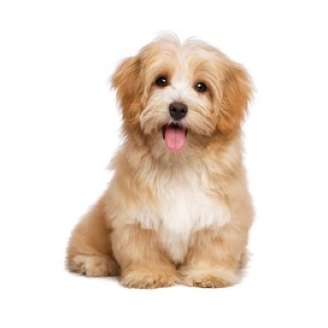

In [10]:
import matplotlib.pyplot as plt

# matplotlib expects the color channel in last position
# use permute to change the shape
img_to_display = img.permute(1,2,0)
plt.figure(figsize=(4,4))
plt.imshow(img_to_display)
plt.axis(False)

In [15]:
import torch
from torch import nn

#Passing the image through a 2d convolution
with torch.inference_mode(): #To turn off the gradients
  conv_layer = nn.Conv2d(
      in_channels=3, #Passed image has 3 channels R,G,B
      out_channels=10, #It will generate 10 different outputs using 10 different kernels/filters
      kernel_size=3, # 3x3 tensor
      stride=1,
      padding=1
      )
  conv_img = conv_layer(img)
  print(conv_img.shape)

#This convolution layer is just created, so filters/kernels are randomly initialized.

torch.Size([10, 256, 256])


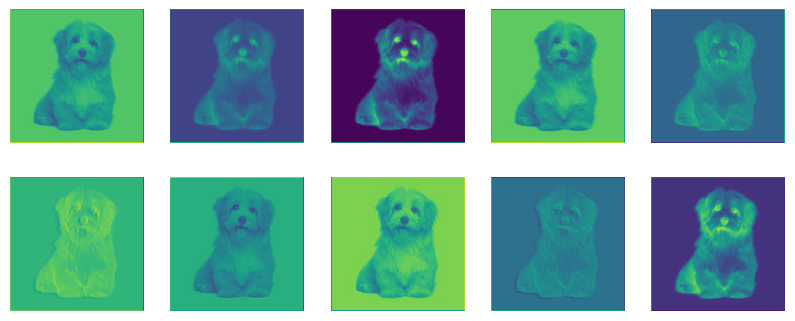

In [16]:
def display_images(images: torch.Tensor):
  plt.figure(figsize=(10,4))
  for i in range(10):
    img = images[i, :, :]
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.axis(False)

#Shows the 10 outputs created by conv2d layer, which should activate certain features in image
#During training kernel/filter values will be learned to correctly activate those filters.
display_images(conv_img)